In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Load the data into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\chara\OneDrive\Desktop\supermarket_sales.csv',index_col=False)

In [3]:
## Insights and Visualizations
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
#1.Total_Revanue
tatalRavenue = df['Total'].sum()
math.ceil(tatalRavenue)


322967

  Branch        Total
0      A  106200.3705
1      B  106197.6720
2      C  110568.7065


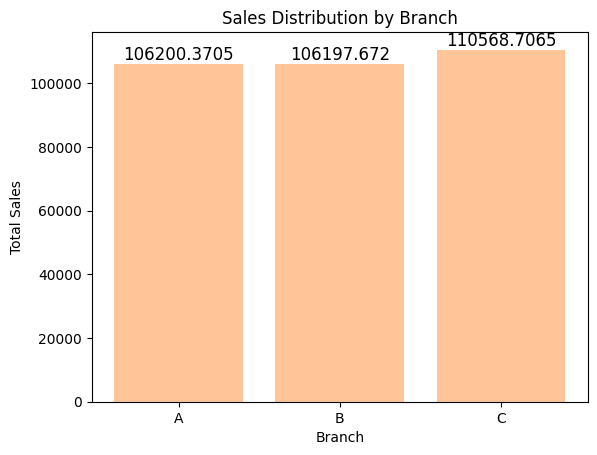

In [5]:
#2.Sales distribution by Branch
branch_sales = df.groupby('Branch')['Total'].sum().reset_index()
print(branch_sales)

# Plot the bar chart
plt.bar(branch_sales['Branch'], branch_sales['Total'],color = '#FFC599')
for x, y in zip(branch_sales['Branch'], branch_sales['Total']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=12)
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Branch')
plt.show()

        City        Total
0   Mandalay  106197.6720
1  Naypyitaw  110568.7065
2     Yangon  106200.3705


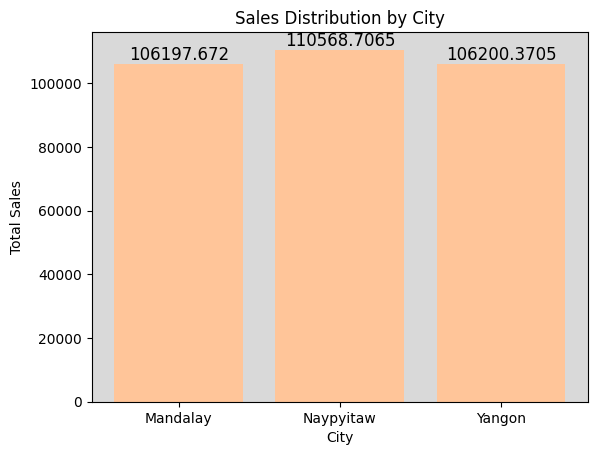

In [6]:
#3.Sales distribution by city
city_sales = df.groupby('City')['Total'].sum().reset_index()
print(city_sales)

# Plot the bar chart
plt.bar(city_sales['City'], city_sales['Total'],color = '#FFC599')
plt.gca().set_facecolor('#D9D9D9') 
plt.xlabel('City')
plt.ylabel('Total Sales')
for x, y in zip(city_sales['City'], city_sales['Total']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=12)
plt.title('Sales Distribution by City')
plt.show()

  Customer type       Total
0        Member  164223.444
1        Normal  158743.305


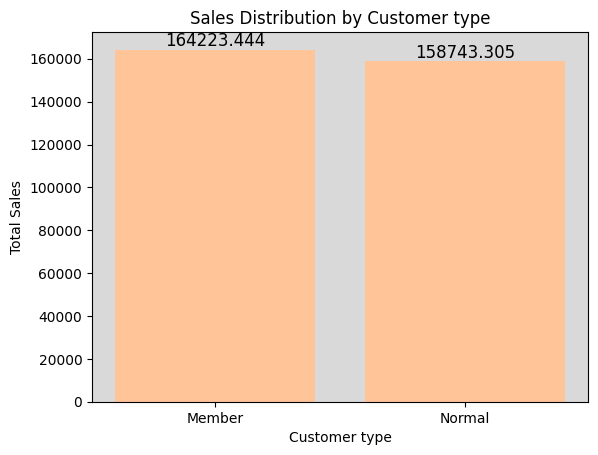

In [4]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r'C:\Users\chara\OneDrive\Desktop\supermarket_sales.csv',index_col=False)
#4.Sales distribution by customer type
ctype_sales = df.groupby('Customer type')['Total'].sum().reset_index()
print(ctype_sales)

# Plot the bar chart
plt.bar(ctype_sales['Customer type'],ctype_sales['Total'],color = '#FFC599')
plt.gca().set_facecolor('#D9D9D9') 
plt.xlabel('Customer type')
plt.ylabel('Total Sales')
for x, y in zip(ctype_sales['Customer type'], ctype_sales['Total']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=12)
plt.title('Sales Distribution by Customer type')
plt.show()

In [2]:
#5.Sales distribution by Product line
Pline_sales = df.groupby('Product line')['Total'].sum().reset_index()
print(Pline_sales)

# Plot the bar chart
plt.figure(figsize=(8, 4))
plt.bar(Pline_sales['Product line'],Pline_sales['Total'],color = '#FFC599')
plt.gca().set_facecolor('#D9D9D9') 
plt.xlabel('Product line')
plt.ylabel('Total Sales')
for x, y in zip(Pline_sales['Product line'], Pline_sales['Total']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=12)
plt.title('Sales Distribution by Product line')
plt.show()

NameError: name 'df' is not defined

   Gender       Total
0  Female  167882.925
1    Male  155083.824


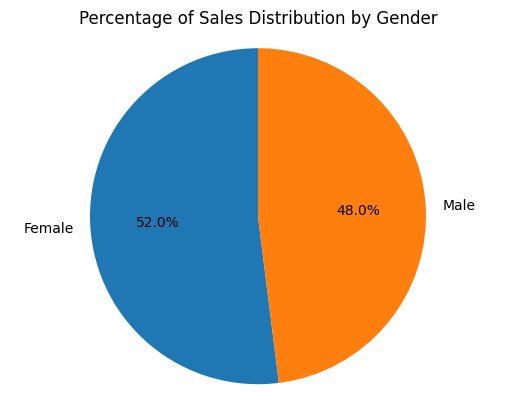

In [18]:
#6.Percentage of sales distribution by Gender
gender_sales = df.groupby('Gender')['Total'].sum().reset_index()
print(gender_sales)

# Create the pie chart
labels = gender_sales['Gender']
sizes = gender_sales['Total']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Sales Distribution by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


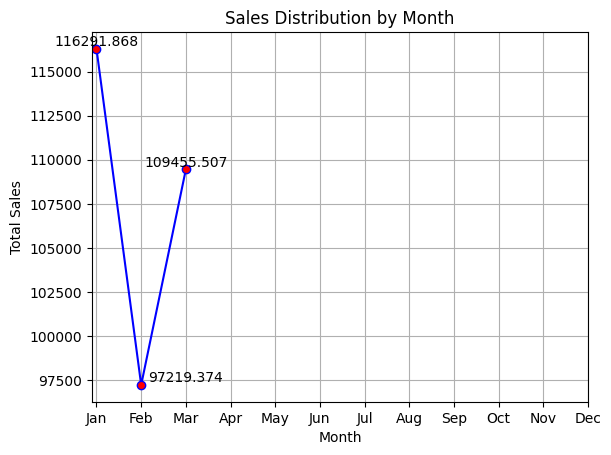

In [23]:
#7.Sales distribution by Month
# Convert the "Date" column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and create a new "Month" column
df['Month'] = df['Date'].dt.month
# Group the data by the "Month" column and calculate the sum of sales for each month
month_sales = df.groupby('Month')['Total'].sum().reset_index()

# Create the line chart
plt.plot(month_sales['Month'], month_sales['Total'], marker='o', linestyle='-', color='b', markerfacecolor='r')
for i, total in enumerate( month_sales['Total']):
    plt.text(df['Month'][i], total, str(total), ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Month')
plt.grid(True)
# Set custom tick locations and labels for the x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ticks = range(1,13)  # Assuming you have 12 months
plt.xticks(month_ticks, month_labels)
plt.show()

       Payment       Total
0         Cash  112206.570
1  Credit card  100767.072
2      Ewallet  109993.107


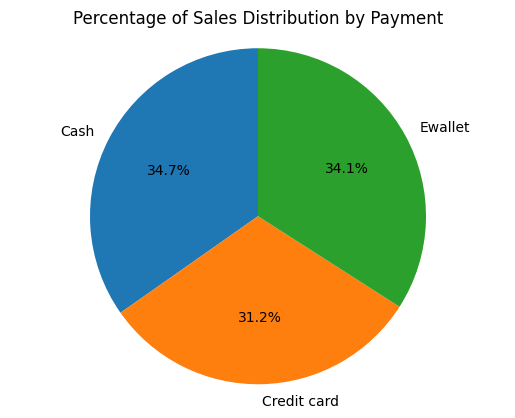

In [24]:
#8.Percentage of payment distribution by Payment method
Payment_sales = df.groupby('Payment')['Total'].sum().reset_index()
print(Payment_sales)

# Create the pie chart
labels = Payment_sales['Payment']
sizes = Payment_sales['Total']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Sales Distribution by Payment')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [1]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
#read csv file
df = pd.read_csv(r'C:\Users\chara\OneDrive\Desktop\supermarket_sales.csv',index_col=False)
# to encode catagorical data in the binary data
lebel_encoder = LabelEncoder()
df['Branch'] = lebel_encoder.fit_transform(df['Branch'])
df['City'] = lebel_encoder.fit_transform((df['City'] ))
df['Customer type'] = lebel_encoder.fit_transform((df['Customer type']))
df['Gender'] = lebel_encoder.fit_transform(df['Gender'])
df['Product line'] = lebel_encoder.fit_transform((df['Product line']))
df['Payment'] = lebel_encoder.fit_transform((df['Payment'] ))

df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month
X= df[['Unit price','Quantity']]
y= df['Total']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)
mse = mean_squared_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)
print(mse)
print(r2)


X_new =np.array([[500,100],[10,40]])
y_pred=model.predict(X_new)
print(y_pred)

[ 509.5146078   600.95868184  407.96594901  101.70754226  -78.87242053
  602.06029381  147.24792969  662.72821025  478.1843573   121.59967774
  493.69646443  486.35947766  253.39239678  316.86975243  386.50322438
  405.18806989  549.40969734  226.86417003  678.47737626  166.32835109
  410.31155159  258.52615963  147.76974588  141.39199242  354.10806257
  334.3480246   657.45720932 -120.09589976  129.83277767   47.89735425
  153.24624562  564.13650989  267.23409396  442.49535739  237.79589058
  151.42759981  628.78887879  218.18851241  177.34447072  204.7739512
  207.26193244  769.73723043   51.56034875  293.70434114  249.84022087
  464.05347888  231.50253619  112.89246004  380.68912833  286.06131812
  444.71986024  213.93986494    6.18875947  283.44709659  169.43282875
  514.81716881  478.75387193   -5.23321719  445.47873531  217.46633799
   78.02545535 -111.97875898   27.81514169  780.25795336  386.39754637
  542.22537036  367.92848082  668.67368718  779.07194232  136.12613206
  387.5

C:\Users\chara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
